In [1]:
import tensorflow as tf
import pandas as pd
import xarray as xr
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error,confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, precision_score, recall_score, average_precision_score, brier_score_loss
import seaborn as sns
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
import keras
from sklearn.calibration import calibration_curve

#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



# Deep learning model
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Embedding, Dropout, Flatten
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1, l2
from keras.layers import BatchNormalization
from scikeras.wrappers import KerasClassifier, KerasRegressor
import keras.backend as K


2024-05-13 12:27:58.847332: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 12:27:58.886447: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 12:27:58.886504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 12:27:58.887300: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 12:27:58.892958: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 12:27:58.893408: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Data for models with 0.01/1% of Majority Class

In [2]:
y_pred_t1 = np.load('y_pred_t+1.npy')
y_test_t1 = np.load('y_test_t+1.npy')

y_pred_t2 = np.load('y_pred_t+2.npy')
y_test_t2 = np.load('y_test_t+2.npy')

y_pred_t3 = np.load('y_pred_t+3.npy')
y_test_t3 = np.load('y_test_t+3.npy')

y_pred_t4 = np.load('y_pred_t+4.npy')
y_test_t4 = np.load('y_test_t+4.npy')

y_pred_t5 = np.load('y_pred_t+5.npy')
y_test_t5 = np.load('y_test_t+5.npy')

y_pred_persistence = np.load('y_pred_persistence.npy')
y_test_persistence = np.load('y_test_persistence.npy')

y_test_instant = np.load('y_test_instantanous.npy')
y_pred_instant = np.load('y_pred_instantanous.npy')

## Data for models with 0.033/3.3% of Majority Class

In [3]:
y_pred_t1_2 = np.load('y_pred_t+1_2.npy')
y_test_t1_2 = np.load('y_test_t+1_2.npy')

y_pred_t2_2 = np.load('y_pred_t+2_2.npy')
y_test_t2_2 = np.load('y_test_t+2_2.npy')

y_pred_t3_2 = np.load('y_pred_t+3_2.npy')
y_test_t3_2 = np.load('y_test_t+3_2.npy')

y_pred_t4_2 = np.load('y_pred_t+4_2.npy')
y_test_t4_2 = np.load('y_test_t+4_2.npy')

y_pred_t5_2 = np.load('y_pred_t+5_2.npy')
y_test_t5_2 = np.load('y_test_t+5_2.npy')

y_pred_t1_without_auto = np.load('y_pred_t+1_without_auto.npy')
y_test_t1_without_auto = np.load('y_test_t+1_without_auto.npy')

y_pred_persistence_2 = np.load('y_pred_persistence_2.npy')
y_test_persistence_2 = np.load('y_test_persistence_2.npy')

y_test_instant_2 = np.load('y_test_instantanous_2.npy')
y_pred_instant_2 = np.load('y_pred_instantanous_2.npy')

## Without Auto

In [4]:
y_pred_t1_without_auto = np.load('y_pred_t+1_without_auto.npy')
y_test_t1_without_auto = np.load('y_test_t+1_without_auto.npy')

y_pred_persistence_without_auto = np.load('y_pred_persistence_without_auto.npy')
y_test_persistence_without_auto = np.load('y_test_persistence_without_auto.npy')

y_pred_instant_without_auto = np.load('y_pred_instant_without_auto.npy')
y_test_instant_without_auto = np.load('y_test_instant_without_auto.npy')

y_pred_t1_without_auto_2 = np.load('y_pred_t+1_without_auto_2.npy')
y_test_t1_without_auto_2 = np.load('y_test_t+1_without_auto_2.npy')

## Color-Palette

In [15]:
# Color palette
cmap_2 = sns.color_palette('viridis', 7)

# ROC and Precision-Recall: Instantanous Model

In [5]:
# Calculate ROC curve: Instantaneous
fpr_instant, tpr_instant, threshold_instant = roc_curve(y_test_instant, y_pred_instant)
fpr_instant_2, tpr_instant_2, threshold_instant_2 = roc_curve(y_test_instant_2, y_pred_instant_2)
fpr_instant_without_auto, tpr_instant_without_auto, threshold_instant_without_auto = roc_curve(y_test_instant_without_auto, y_pred_instant_without_auto)

# Calculate AUC
roc_auc_instant = auc(fpr_instant, tpr_instant)
roc_auc_instant_2 = auc(fpr_instant_2, tpr_instant_2)
roc_auc_instant_without_auto = auc(fpr_instant_without_auto, tpr_instant_without_auto)

# Calculate Precision-Recall, AUC-PR
precision_instant, recall_instant, _ = precision_recall_curve(y_test_instant, y_pred_instant)
pr_auc_instant = average_precision_score(y_test_instant, y_pred_instant)

precision_instant_2, recall_instant_2, _ = precision_recall_curve(y_test_instant_2, y_pred_instant_2)
pr_auc_instant_2 = average_precision_score(y_test_instant_2, y_pred_instant_2)

precision_instant_without_auto, recall_instant_without_auto, _ = precision_recall_curve(y_test_instant_without_auto, y_pred_instant_without_auto)
pr_auc_instant_without_auto = average_precision_score(y_test_instant_without_auto, y_pred_instant_without_auto)

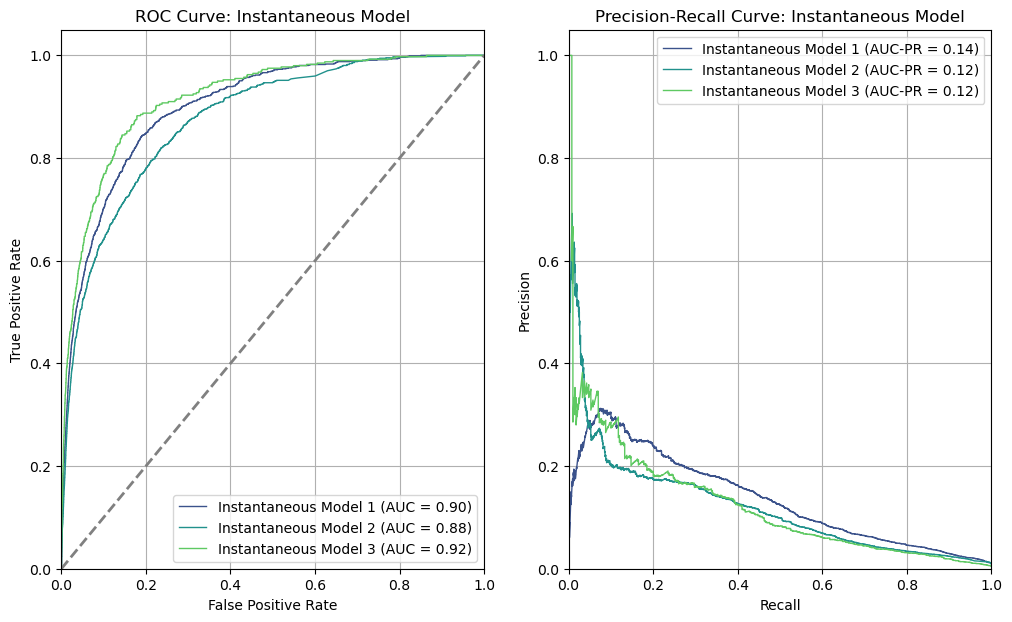

In [21]:
# Plot the ROC curve
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(fpr_instant, tpr_instant, color=cmap_2[1], lw=1, label='Instantaneous Model 1 (AUC = %0.2f)' % roc_auc_instant)
plt.plot(fpr_instant_2, tpr_instant_2, color=cmap_2[3], lw=1, label='Instantaneous Model 2 (AUC = %0.2f)' % roc_auc_instant_2)
plt.plot(fpr_instant_without_auto, tpr_instant_without_auto, color=cmap_2[5], lw=1, label='Instantaneous Model 3 (AUC = %0.2f)' % roc_auc_instant_without_auto)

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Instantaneous Model')
plt.grid(True)
plt.legend(loc="lower right")

# Plot the Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(recall_instant, precision_instant, color=cmap_2[1], lw=1, label='Instantaneous Model 1 (AUC-PR = %0.2f)' % pr_auc_instant)
plt.plot(recall_instant_2, precision_instant_2, color=cmap_2[3], lw=1, label='Instantaneous Model 2 (AUC-PR = %0.2f)' % pr_auc_instant_2)
plt.plot(recall_instant_without_auto, precision_instant_without_auto, color=cmap_2[5], lw=1, label='Instantaneous Model 3 (AUC-PR = %0.2f)' % pr_auc_instant_without_auto)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Instantaneous Model')
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('roc_precision_recall_instant.png')
plt.show()

# ROC and Precision-Recall: Downsampled majority class by 0.01

In [22]:
# Calculate ROC curve: 1% of Majority Class
fpr_1, tpr_1, threshold_1 = roc_curve(y_test_t1, y_pred_t1)
fpr_2, tpr_2, threshold_2 = roc_curve(y_test_t2, y_pred_t2)
fpr_3, tpr_3, threshold_3 = roc_curve(y_test_t3, y_pred_t3)
fpr_4, tpr_4, threshold_3 = roc_curve(y_test_t4, y_pred_t4)
fpr_5, tpr_5, threshold_3 = roc_curve(y_test_t5, y_pred_t5)

# Calculate AUC for each model
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)
roc_auc_3 = auc(fpr_3, tpr_3)
roc_auc_4 = auc(fpr_4, tpr_4)
roc_auc_5 = auc(fpr_5, tpr_5)


# Calculate the Precision-Recall curve
# Model 1
precision_1, recall_1, _ = precision_recall_curve(y_test_t1, y_pred_t1)
pr_auc_1 = average_precision_score(y_test_t1, y_pred_t1)

# Model 2
precision_2, recall_2, _ = precision_recall_curve(y_test_t2, y_pred_t2)
pr_auc_2 = average_precision_score(y_test_t2, y_pred_t2)

# Model 3
precision_3, recall_3, _ = precision_recall_curve(y_test_t3, y_pred_t3)
pr_auc_3 = average_precision_score(y_test_t3, y_pred_t3)

# Model 4
precision_4, recall_4, _ = precision_recall_curve(y_test_t4, y_pred_t4)
pr_auc_4 = average_precision_score(y_test_t4, y_pred_t4)

# Model 5
precision_5, recall_5, _ = precision_recall_curve(y_test_t5, y_pred_t5)
pr_auc_5 = average_precision_score(y_test_t5, y_pred_t5)

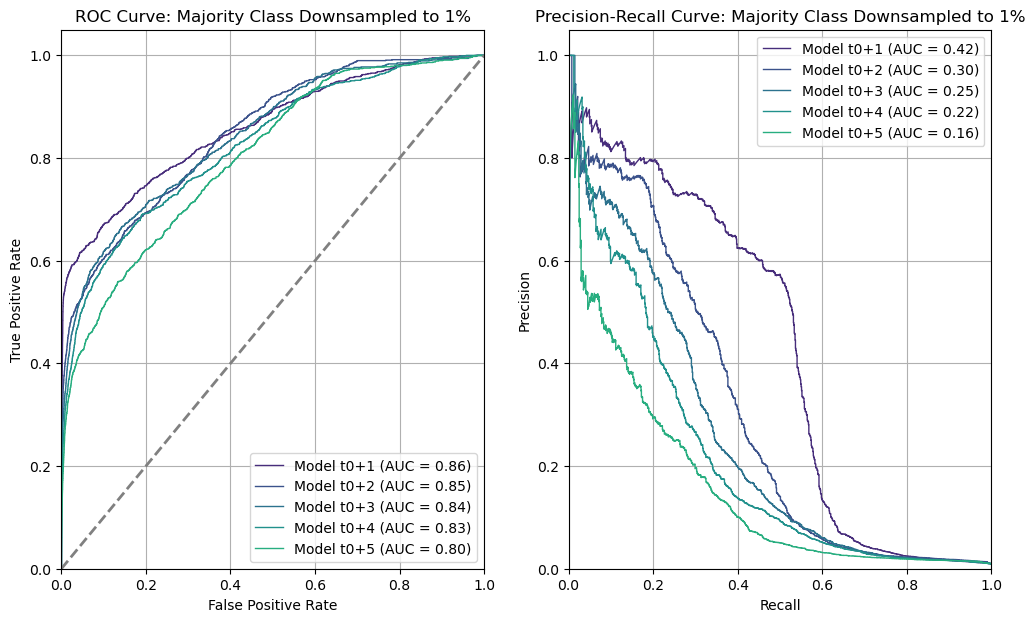

In [23]:
# Plot the ROC curve
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(fpr_1, tpr_1, color=cmap_2[0], lw=1, label='Model t0+1 (AUC = %0.2f)' % roc_auc_1)
plt.plot(fpr_2, tpr_2, color=cmap_2[1], lw=1, label='Model t0+2 (AUC = %0.2f)' % roc_auc_2)
plt.plot(fpr_3, tpr_3, color=cmap_2[2], lw=1, label='Model t0+3 (AUC = %0.2f)' % roc_auc_3)
plt.plot(fpr_4, tpr_4, color=cmap_2[3], lw=1, label='Model t0+4 (AUC = %0.2f)' % roc_auc_4)
plt.plot(fpr_5, tpr_5, color=cmap_2[4], lw=1, label='Model t0+5 (AUC = %0.2f)' % roc_auc_5)

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Majority Class Downsampled to 1%')
plt.grid(True)
plt.legend(loc="lower right")

# Plot the Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(recall_1, precision_1, color=cmap_2[0], lw=1, label='Model t0+1 (AUC = %0.2f)' % pr_auc_1)
plt.plot(recall_2, precision_2, color=cmap_2[1], lw=1, label='Model t0+2 (AUC = %0.2f)' % pr_auc_2)
plt.plot(recall_3, precision_3, color=cmap_2[2], lw=1, label='Model t0+3 (AUC = %0.2f)' % pr_auc_3)
plt.plot(recall_4, precision_4, color=cmap_2[3], lw=1, label='Model t0+4 (AUC = %0.2f)' % pr_auc_4)
plt.plot(recall_5, precision_5, color=cmap_2[4], lw=1, label='Model t0+5 (AUC = %0.2f)' % pr_auc_5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Majority Class Downsampled to 1%')
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('roc_precision_recall_1percent.png')
plt.show()

## ROC and Precision-Recall: Downsampled majority class by 0.033

In [24]:
#Calculate ROC curve: 3.3% of Majority Class
fpr_1_2, tpr_1_2, threshold_1_2 = roc_curve(y_test_t1_2, y_pred_t1_2)
fpr_2_2, tpr_2_2, threshold_2_2 = roc_curve(y_test_t2_2, y_pred_t2_2)
fpr_3_2, tpr_3_2, threshold_3_2 = roc_curve(y_test_t3_2, y_pred_t3_2)
fpr_4_2, tpr_4_2, threshold_3_2 = roc_curve(y_test_t4_2, y_pred_t4_2)
fpr_5_2, tpr_5_2, threshold_3_2 = roc_curve(y_test_t5_2, y_pred_t5_2)

# Calculate AUC for each model
roc_auc_1_2 = auc(fpr_1_2, tpr_1_2)
roc_auc_2_2 = auc(fpr_2_2, tpr_2_2)
roc_auc_3_2 = auc(fpr_3_2, tpr_3_2)
roc_auc_4_2 = auc(fpr_4_2, tpr_4_2)
roc_auc_5_2 = auc(fpr_5_2, tpr_5_2)



# Calculate the Precision-Recall curve
# Model 1
precision_1_2, recall_1_2, _ = precision_recall_curve(y_test_t1_2, y_pred_t1_2)
pr_auc_1_2 = average_precision_score(y_test_t1_2, y_pred_t1_2)

# Model 2
precision_2_2, recall_2_2, _ = precision_recall_curve(y_test_t2_2, y_pred_t2_2)
pr_auc_2_2 = average_precision_score(y_test_t2_2, y_pred_t2_2)

# Model 3
precision_3_2, recall_3_2, _ = precision_recall_curve(y_test_t3_2, y_pred_t3_2)
pr_auc_3_2 = average_precision_score(y_test_t3_2, y_pred_t3_2)

# Model 4
precision_4_2, recall_4_2, _ = precision_recall_curve(y_test_t4_2, y_pred_t4_2)
pr_auc_4_2 = average_precision_score(y_test_t4_2, y_pred_t4_2)

# Model 5
precision_5_2, recall_5_2, _ = precision_recall_curve(y_test_t5_2, y_pred_t5_2)
pr_auc_5_2 = average_precision_score(y_test_t5_2, y_pred_t5_2)


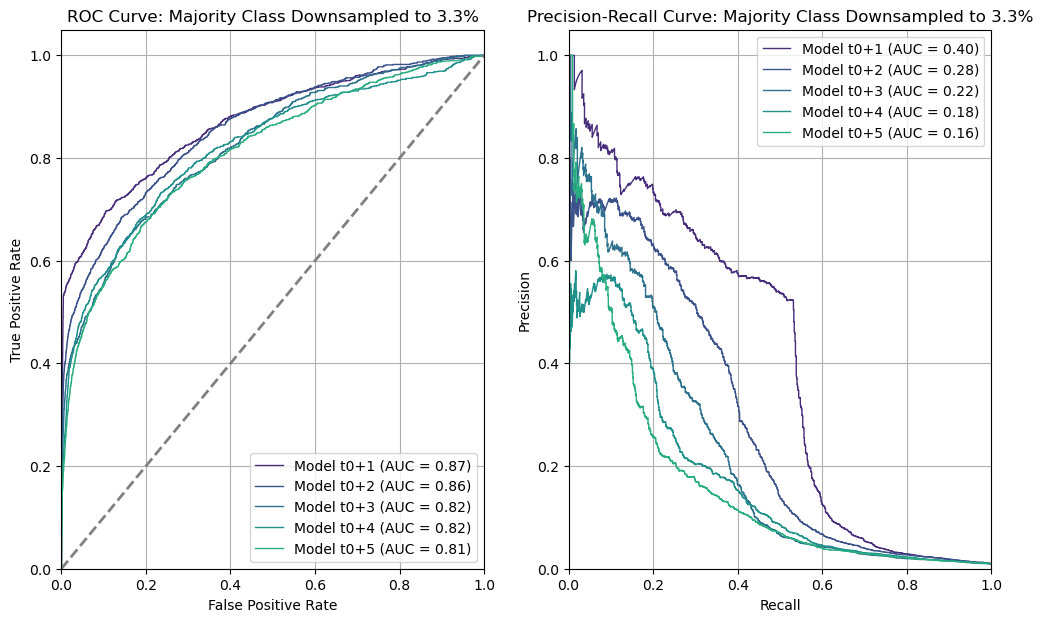

In [25]:
# ROC curve
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(fpr_1_2, tpr_1_2, color=cmap_2[0], lw=1, label='Model t0+1 (AUC = %0.2f)' % roc_auc_1_2)
plt.plot(fpr_2_2, tpr_2_2, color=cmap_2[1], lw=1, label='Model t0+2 (AUC = %0.2f)' % roc_auc_2_2)
plt.plot(fpr_3_2, tpr_3_2, color=cmap_2[2], lw=1, label='Model t0+3 (AUC = %0.2f)' % roc_auc_3_2)
plt.plot(fpr_4_2, tpr_4_2, color=cmap_2[3], lw=1, label='Model t0+4 (AUC = %0.2f)' % roc_auc_4_2)
plt.plot(fpr_5_2, tpr_5_2, color=cmap_2[4], lw=1, label='Model t0+5 (AUC = %0.2f)' % roc_auc_5_2)

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Majority Class Downsampled to 3.3%')
plt.legend(loc="lower right")
plt.grid(True)

# Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(recall_1_2, precision_1_2, color=cmap_2[0], lw=1, label='Model t0+1 (AUC = %0.2f)' % pr_auc_1_2)
plt.plot(recall_2_2, precision_2_2, color=cmap_2[1], lw=1, label='Model t0+2 (AUC = %0.2f)' % pr_auc_2_2)
plt.plot(recall_3_2, precision_3_2, color=cmap_2[2], lw=1, label='Model t0+3 (AUC = %0.2f)' % pr_auc_3_2)
plt.plot(recall_4_2, precision_4_2, color=cmap_2[3], lw=1, label='Model t0+4 (AUC = %0.2f)' % pr_auc_4_2)
plt.plot(recall_5_2, precision_5_2, color=cmap_2[4], lw=1, label='Model t0+5 (AUC = %0.2f)' % pr_auc_5_2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Majority Class Downsampled to 3.3%')
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('roc_precision_recall_3_3percent.png')
plt.show()

## ROC and Precision-Recall: Persistence

In [6]:

fpr_persistence, tpr_persistence, threshold_persistence = roc_curve(y_test_persistence, y_pred_persistence)
fpr_persistence_2, tpr_persistence_2, threshold_persistence_2 = roc_curve(y_test_persistence_2, y_pred_persistence_2)
fpr_persistence_without_auto, tpr_persistence_without_auto, threshold_persistence_without_auto = roc_curve(y_test_persistence_without_auto, y_pred_persistence_without_auto)


roc_auc_persistence = auc(fpr_persistence, tpr_persistence)
roc_auc_persistence_2 = auc(fpr_persistence_2, tpr_persistence_2)
roc_auc_persistence_without_auto = auc(fpr_persistence_without_auto, tpr_persistence_without_auto)

# Calculate the Precision-Recall curve
# Persistence Model 1% of Majority class
precision_persistence, recall_persistence, _ = precision_recall_curve(y_test_persistence, y_pred_persistence)
pr_auc_persistence = average_precision_score(y_test_persistence, y_pred_persistence)

# Persistence Model 3.3% of Majority Class
precision_persistence_2, recall_persistence_2, _ = precision_recall_curve(y_test_persistence_2, y_pred_persistence_2)
pr_auc_persistence_2 = average_precision_score(y_test_persistence_2, y_pred_persistence_2)

# Persistence Model without AUTO Metar
precision_persistence_without_auto, recall_persistence_without_auto, _ = precision_recall_curve(y_test_persistence_without_auto, y_pred_persistence_without_auto)
pr_auc_persistence_without_auto = average_precision_score(y_test_persistence_without_auto, y_pred_persistence_without_auto)


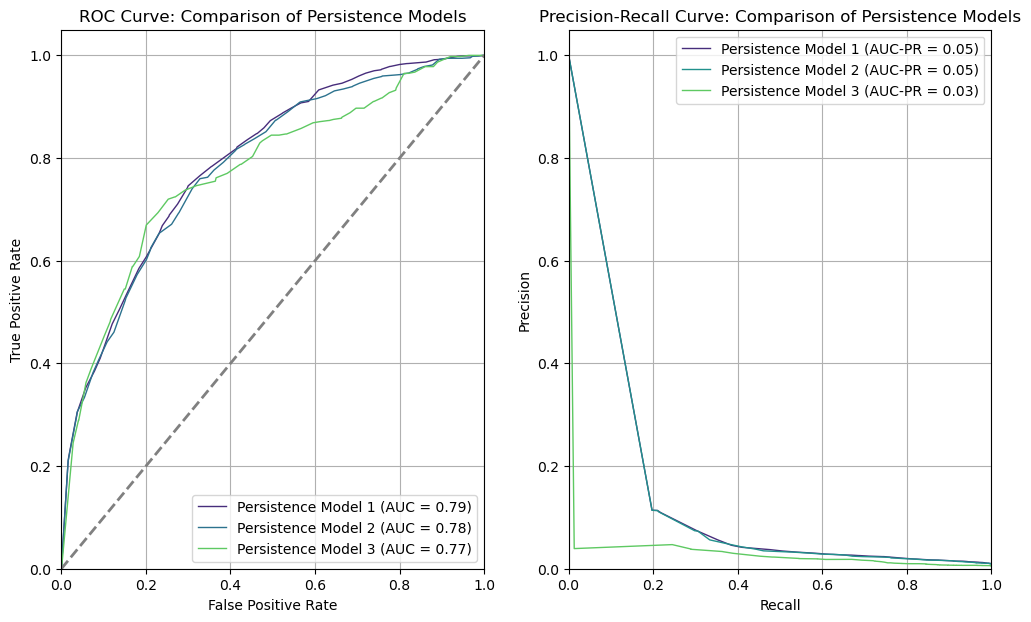

In [27]:
# ROC curve
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(fpr_persistence, tpr_persistence, color=cmap_2[0], lw=1, label='Persistence Model 1 (AUC = %0.2f)' % roc_auc_persistence)
plt.plot(fpr_persistence_2, tpr_persistence_2, color=cmap_2[2], lw=1, label='Persistence Model 2 (AUC = %0.2f)' % roc_auc_persistence_2)
plt.plot(fpr_persistence_without_auto, tpr_persistence_without_auto, color=cmap_2[5], lw=1, label='Persistence Model 3 (AUC = %0.2f)' % roc_auc_persistence_without_auto)


plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Comparison of Persistence Models')
plt.legend(loc="lower right")
plt.grid(True)

# Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(recall_persistence, precision_persistence, color=cmap_2[0], lw=1, label='Persistence Model 1 (AUC-PR = %0.2f)' % pr_auc_persistence)
plt.plot(recall_persistence_2, precision_persistence_2, color=cmap_2[3], lw=1, label='Persistence Model 2 (AUC-PR = %0.2f)' % pr_auc_persistence_2)
plt.plot(recall_persistence_without_auto, precision_persistence_without_auto, color=cmap_2[5], lw=1, label='Persistence Model 3 (AUC-PR = %0.2f)' % pr_auc_persistence_without_auto)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Comparison of Persistence Models')
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('roc_precision_recall_persistence_models.png')
plt.show()

## ROC and Precision-Recall curve: Temporal model without metartype AUTO

In [8]:
# Calculate ROC cuvrve
fpr_1_without_auto, tpr_1_without_auto, threshold_1_without_auto = roc_curve(y_test_t1_without_auto, y_pred_t1_without_auto)
fpr_1_without_auto_2, tpr_1_without_auto_2, threshold_1_without_auto_2 = roc_curve(y_test_t1_without_auto_2, y_pred_t1_without_auto_2)
# Calculate AUC for each model

roc_auc_1_without_auto = auc(fpr_1_without_auto, tpr_1_without_auto)
roc_auc_1_without_auto_2 = auc(fpr_1_without_auto_2, tpr_1_without_auto_2)

# Calculate Precision-Recall for all models
precision_1_without_auto, recall_1_without_auto, _ = precision_recall_curve(y_test_t1_without_auto, y_pred_t1_without_auto)
pr_auc_1_without_auto = average_precision_score(y_test_t1_without_auto, y_pred_t1_without_auto)

precision_1_without_auto_2, recall_1_without_auto_2, _ = precision_recall_curve(y_test_t1_without_auto_2, y_pred_t1_without_auto_2)
pr_auc_1_without_auto_2 = average_precision_score(y_test_t1_without_auto_2, y_pred_t1_without_auto_2)



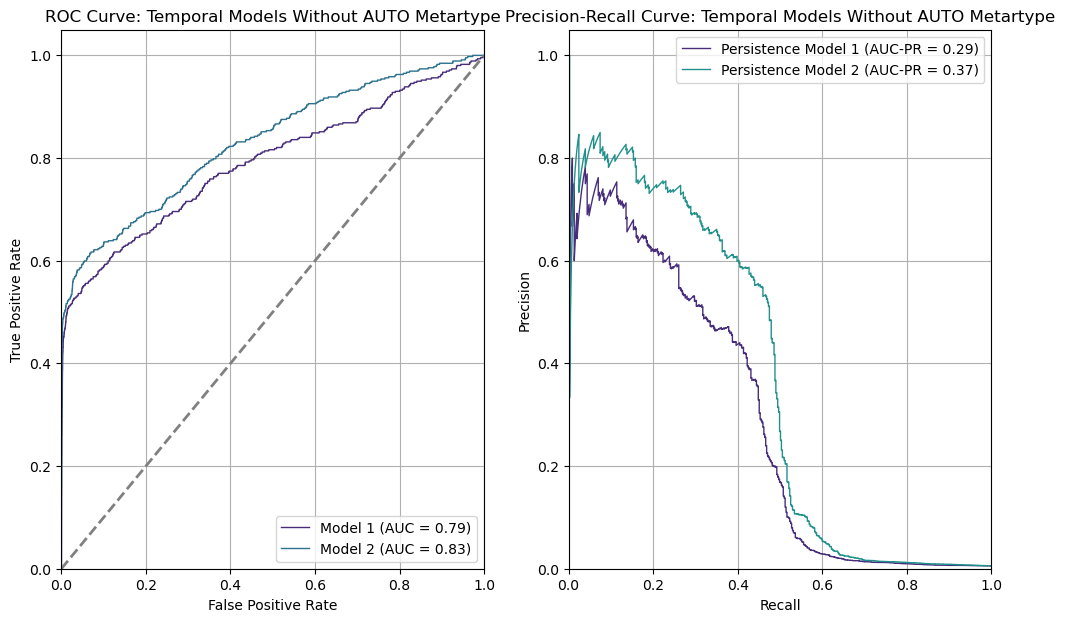

In [29]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(fpr_1_without_auto, tpr_1_without_auto, color=cmap_2[0], lw=1, label='Model 1 (AUC = %0.2f)' % roc_auc_1_without_auto)
plt.plot(fpr_1_without_auto_2, tpr_1_without_auto_2, color=cmap_2[2], lw=1, label='Model 2 (AUC = %0.2f)' % roc_auc_1_without_auto_2)


plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Temporal Models Without AUTO Metartype')
plt.legend(loc="lower right")
plt.grid(True)

# Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(recall_1_without_auto, precision_1_without_auto, color=cmap_2[0], lw=1, label='Persistence Model 1 (AUC-PR = %0.2f)' % pr_auc_1_without_auto)
plt.plot(recall_1_without_auto_2, precision_1_without_auto_2, color=cmap_2[3], lw=1, label='Persistence Model 2 (AUC-PR = %0.2f)' % pr_auc_1_without_auto_2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Temporal Models Without AUTO Metartype')
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('roc_precision_recall_temporal_without_auto.png')
plt.show()

# Classification Reports

In [9]:
threshold_1 = 0.1
threshold_2 = 0.4
threshold_3 = 0.8

# Threshold of 0.1
y_pred_val1_t1 = (y_pred_t1 >= threshold_1)
y_pred_val1_t2 = (y_pred_t2 >= threshold_1)
y_pred_val1_t3 = (y_pred_t3 >= threshold_1)
y_pred_val1_t4 = (y_pred_t4 >= threshold_1)
y_pred_val1_t5 = (y_pred_t5 >= threshold_1)

y_pred_val1_t1_2 = (y_pred_t1_2 >= threshold_1)
y_pred_val1_t2_2 = (y_pred_t2_2 >= threshold_1)
y_pred_val1_t3_2 = (y_pred_t3_2 >= threshold_1)
y_pred_val1_t4_2 = (y_pred_t4_2 >= threshold_1)
y_pred_val1_t5_2 = (y_pred_t5_2 >= threshold_1)

y_pred_val1_persistence = (y_pred_persistence >= threshold_1)
y_pred_val1_persistence_2 = (y_pred_persistence_2 >= threshold_1)
y_pred_val1_persistence_without_auto = (y_pred_persistence_without_auto >= threshold_1)

y_pred_val1_instant = (y_pred_instant >= threshold_1)
y_pred_val1_instant_2 = (y_pred_instant_2 >= threshold_1)
y_pred_val1_instant_without_auto = (y_pred_persistence_without_auto >= threshold_1)

# Threshold of 0.4
y_pred_val2_t1 = (y_pred_t1 >= threshold_2)
y_pred_val2_t2 = (y_pred_t2 >= threshold_2)
y_pred_val2_t3 = (y_pred_t3 >= threshold_2)
y_pred_val2_t4 = (y_pred_t4 >= threshold_2)
y_pred_val2_t5 = (y_pred_t5 >= threshold_2)

y_pred_val2_t1_2 = (y_pred_t1_2 >= threshold_2)
y_pred_val2_t2_2 = (y_pred_t2_2 >= threshold_2)
y_pred_val2_t3_2 = (y_pred_t3_2 >= threshold_2)
y_pred_val2_t4_2 = (y_pred_t4_2 >= threshold_2)
y_pred_val2_t5_2 = (y_pred_t5_2 >= threshold_2)

y_pred_val2_persistence = (y_pred_persistence >= threshold_2)
y_pred_val2_persistence_2 = (y_pred_persistence_2 >= threshold_2)
y_pred_val2_persistence_without_auto = (y_pred_persistence_without_auto >= threshold_2)

y_pred_val2_instant = (y_pred_instant >= threshold_2)
y_pred_val2_instant_2 = (y_pred_instant_2 >= threshold_2)
y_pred_val2_instant_without_auto = (y_pred_persistence_without_auto >= threshold_2)

# Threshold of 0.8
y_pred_val3_t1 = (y_pred_t1 >= threshold_3)
y_pred_val3_t2 = (y_pred_t2 >= threshold_3)
y_pred_val3_t3 = (y_pred_t3 >= threshold_3)
y_pred_val3_t4 = (y_pred_t4 >= threshold_3)
y_pred_val3_t5 = (y_pred_t5 >= threshold_3)

y_pred_val3_t1_2 = (y_pred_t1_2 >= threshold_3)
y_pred_val3_t2_2 = (y_pred_t2_2 >= threshold_3)
y_pred_val3_t3_2 = (y_pred_t3_2 >= threshold_3)
y_pred_val3_t4_2 = (y_pred_t4_2 >= threshold_3)
y_pred_val3_t5_2 = (y_pred_t5_2 >= threshold_3)

y_pred_val3_persistence = (y_pred_persistence >= threshold_3)
y_pred_val3_persistence_2 = (y_pred_persistence_2 >= threshold_3)
y_pred_val3_persistence_without_auto = (y_pred_persistence_without_auto >= threshold_3)

y_pred_val3_instant = (y_pred_instant >= threshold_3)
y_pred_val3_instant_2 = (y_pred_instant_2 >= threshold_3)
y_pred_val3_instant_without_auto = (y_pred_persistence_without_auto >= threshold_3)


### Threshold value: 0.1

In [15]:
# Persistence 1% of Majority Class
print(classification_report(y_test_persistence, y_pred_val3_persistence))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99    109993
        True       0.11      0.21      0.15      1070

    accuracy                           0.98    111063
   macro avg       0.55      0.60      0.57    111063
weighted avg       0.98      0.98      0.98    111063



In [112]:
# Persistence 3.3% of Majority Class
print(classification_report(y_test_persistence_2, y_pred_val3_persistence_2))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    109993
        True       0.00      0.00      0.00      1070

    accuracy                           0.99    111063
   macro avg       0.50      0.50      0.50    111063
weighted avg       0.98      0.99      0.99    111063



/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
# Persistence without AUTO
print(classification_report(y_test_persistence_without_auto, y_pred_val3_persistence_without_auto))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00     81930
        True       0.00      0.00      0.00       457

    accuracy                           0.99     82387
   macro avg       0.50      0.50      0.50     82387
weighted avg       0.99      0.99      0.99     82387



/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
# t0+1, 1% of Majority Class
print(classification_report(y_test_t1_2, y_pred_val3_t1_2))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    110021
        True       1.00      0.00      0.01      1042

    accuracy                           0.99    111063
   macro avg       1.00      0.50      0.50    111063
weighted avg       0.99      0.99      0.99    111063



In [92]:
# t0+2, 1% of Majority Class
print(classification_report(y_test_t2_2, y_pred_val3_t2_2))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    109985
        True       0.69      0.01      0.02      1078

    accuracy                           0.99    111063
   macro avg       0.84      0.50      0.51    111063
weighted avg       0.99      0.99      0.99    111063



In [93]:
# t0+3, 1% of Majority Class
print(classification_report(y_test_t3_2, y_pred_val3_t3_2))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    110040
        True       1.00      0.00      0.01      1023

    accuracy                           0.99    111063
   macro avg       1.00      0.50      0.50    111063
weighted avg       0.99      0.99      0.99    111063



In [94]:
# t0+4, 1% of Majority Class
print(classification_report(y_test_t4_2, y_pred_val3_t4_2))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    109991
        True       0.67      0.00      0.00      1072

    accuracy                           0.99    111063
   macro avg       0.83      0.50      0.50    111063
weighted avg       0.99      0.99      0.99    111063



In [95]:
# t0+5, 1% of Majority Class
print(classification_report(y_test_t5_2, y_pred_val3_t5_2))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    109976
        True       0.76      0.01      0.03      1087

    accuracy                           0.99    111063
   macro avg       0.88      0.51      0.51    111063
weighted avg       0.99      0.99      0.99    111063



#### 1% of Majority Class

In [70]:
print(classification_report(y_test_t2_2, y_pred_val2_t2_2))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99    109985
        True       0.41      0.37      0.39      1078

    accuracy                           0.99    111063
   macro avg       0.70      0.68      0.69    111063
weighted avg       0.99      0.99      0.99    111063



In [22]:
print(classification_report(y_test_instant, y_pred_val2_instant))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98    109993
        True       0.14      0.45      0.22      1070

    accuracy                           0.97    111063
   macro avg       0.57      0.71      0.60    111063
weighted avg       0.99      0.97      0.98    111063



In [24]:
print(classification_report(y_test_instant_2, y_pred_val2_instant_2))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    109993
        True       0.57      0.00      0.01      1070

    accuracy                           0.99    111063
   macro avg       0.78      0.50      0.50    111063
weighted avg       0.99      0.99      0.99    111063



In [31]:
print(classification_report(y_test_instant_without_auto, y_pred_val3_instant_without_auto))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     81987
        True       0.00      0.00      0.00       400

    accuracy                           1.00     82387
   macro avg       0.50      0.50      0.50     82387
weighted avg       0.99      1.00      0.99     82387



/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tonjek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Confusion Matrix

In [13]:
# Threshold 0.1, 1%
conf_matrix_t1_val1 = confusion_matrix(y_test_t1, y_pred_val1_t1)
conf_matrix_t2_val1 = confusion_matrix(y_test_t2, y_pred_val1_t2)
conf_matrix_t3_val1 = confusion_matrix(y_test_t3, y_pred_val1_t3)
conf_matrix_t4_val1 = confusion_matrix(y_test_t4, y_pred_val1_t4)
conf_matrix_t5_val1 = confusion_matrix(y_test_t5, y_pred_val1_t5)

In [14]:
# Threshold 0.1, 3.3%
conf_matrix_t1_val1_2 = confusion_matrix(y_test_t1_2, y_pred_val1_t1_2)
conf_matrix_t2_val1_2 = confusion_matrix(y_test_t2_2, y_pred_val1_t2_2)
conf_matrix_t3_val1_2 = confusion_matrix(y_test_t3_2, y_pred_val1_t3_2)
conf_matrix_t4_val1_2 = confusion_matrix(y_test_t4_2, y_pred_val1_t4_2)
conf_matrix_t5_val1_2 = confusion_matrix(y_test_t5_2, y_pred_val1_t5_2)

In [15]:
# Threshold 0.4, 1%
conf_matrix_t1_val2 = confusion_matrix(y_test_t1, y_pred_val2_t1)
conf_matrix_t2_val2 = confusion_matrix(y_test_t2, y_pred_val2_t2)
conf_matrix_t3_val2 = confusion_matrix(y_test_t3, y_pred_val2_t3)
conf_matrix_t4_val2 = confusion_matrix(y_test_t4, y_pred_val2_t4)
conf_matrix_t5_val2 = confusion_matrix(y_test_t5, y_pred_val2_t5)

In [16]:
# Threshold 0.4, 3.3%
conf_matrix_t1_val2_2 = confusion_matrix(y_test_t1_2, y_pred_val2_t1_2)
conf_matrix_t2_val2_2 = confusion_matrix(y_test_t2_2, y_pred_val2_t2_2)
conf_matrix_t3_val2_2 = confusion_matrix(y_test_t3_2, y_pred_val2_t3_2)
conf_matrix_t4_val2_2 = confusion_matrix(y_test_t4_2, y_pred_val2_t4_2)
conf_matrix_t5_val2_2 = confusion_matrix(y_test_t5_2, y_pred_val2_t5_2)

In [17]:
# Threshold 0.8, 1%
conf_matrix_t1_val3 = confusion_matrix(y_test_t1, y_pred_val3_t1)
conf_matrix_t2_val3 = confusion_matrix(y_test_t2, y_pred_val3_t2)
conf_matrix_t3_val3 = confusion_matrix(y_test_t3, y_pred_val3_t3)
conf_matrix_t4_val3 = confusion_matrix(y_test_t4, y_pred_val3_t4)
conf_matrix_t5_val3 = confusion_matrix(y_test_t5, y_pred_val3_t5)

In [18]:
# Threshold 0.8, 3.3%
conf_matrix_t1_val3_2 = confusion_matrix(y_test_t1_2, y_pred_val3_t1_2)
conf_matrix_t2_val3_2 = confusion_matrix(y_test_t2_2, y_pred_val3_t2_2)
conf_matrix_t3_val3_2 = confusion_matrix(y_test_t3_2, y_pred_val3_t3_2)
conf_matrix_t4_val3_2 = confusion_matrix(y_test_t4_2, y_pred_val3_t4_2)
conf_matrix_t5_val3_2 = confusion_matrix(y_test_t5_2, y_pred_val3_t5_2)

In [19]:
conf_matrix_t1_val1
conf_matrix_t2_val1
conf_matrix_t3_val1
conf_matrix_t4_val1
conf_matrix_t5_val1

array([[107402,   2574],
       [   692,    395]])

In [119]:
conf_matrix_t1

array([[109915,    125],
       [   832,    191]])

## 1% Downsampled Majority Class

In [22]:
conf_matrix_palette = sns.color_palette('viridis', 2)

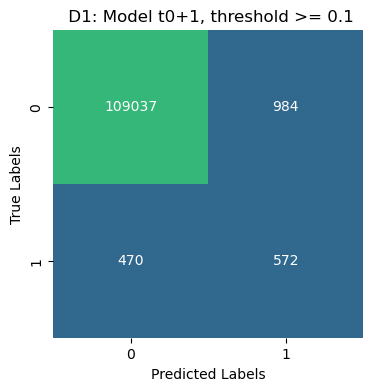

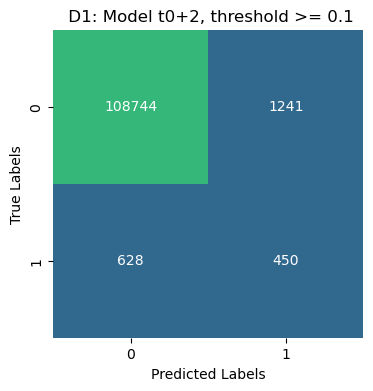

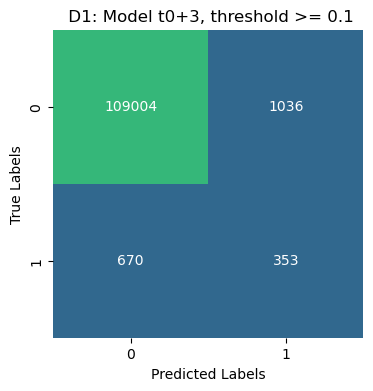

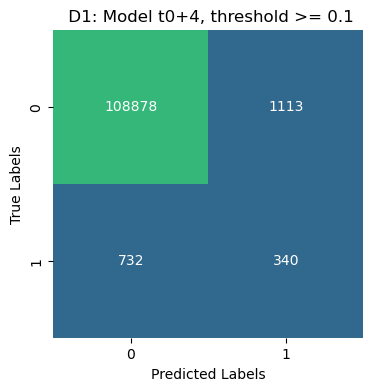

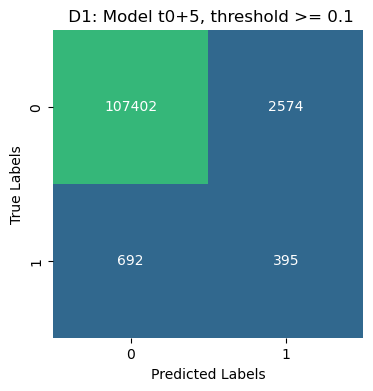

In [23]:

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t1_val1, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+1, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+1_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t2_val1, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+2, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+3_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t3_val1, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+3, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+3_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t4_val1, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+4, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+4_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t5_val1, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+5, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+5_1percent.png')
plt.show()

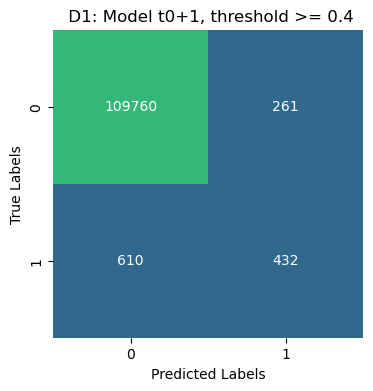

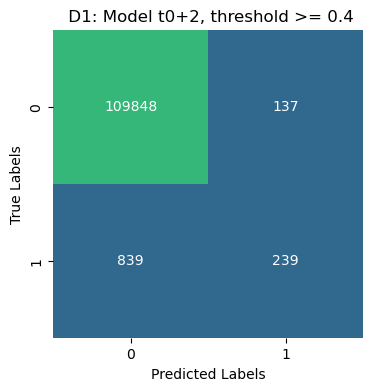

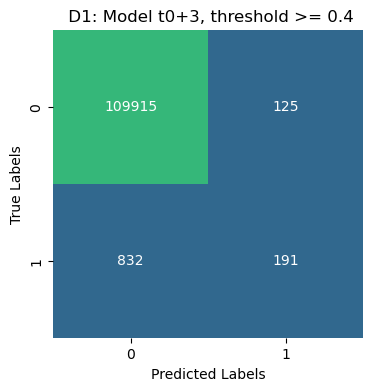

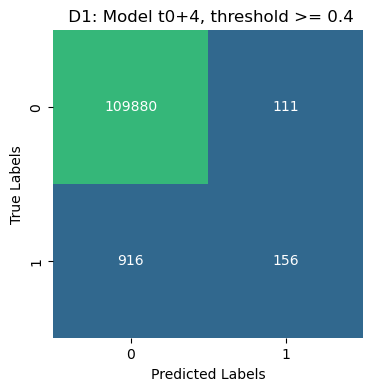

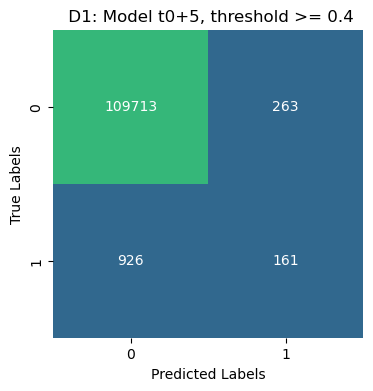

In [25]:

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t1_val2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+1, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+1_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t2_val2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+2, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+3_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t3_val2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+3, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+3_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t4_val2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+4, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+4_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t5_val2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+5, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+5_1percent.png')
plt.show()

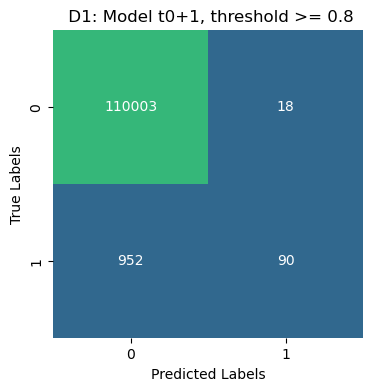

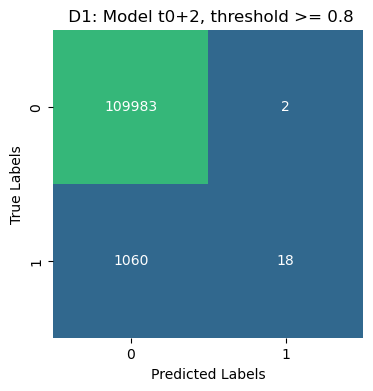

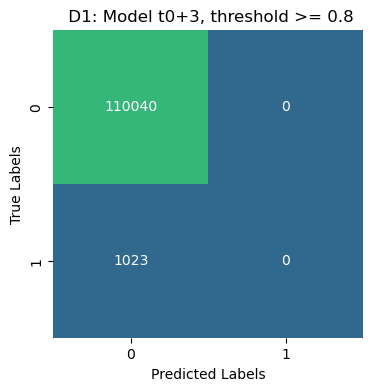

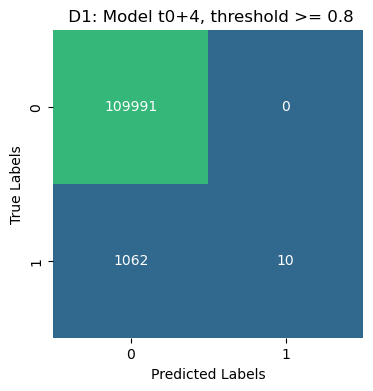

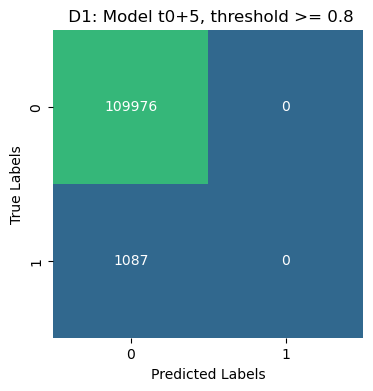

In [67]:

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t1_val3, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+1, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+1_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t2_val3, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+2, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+3_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t3_val3, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+3, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+3_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t4_val3, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+4, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+4_1percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t5_val3, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D1: Model t0+5, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+5_1percent.png')
plt.show()

## 3.3% Downsampled Majority Class

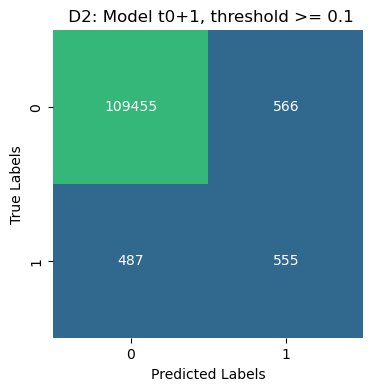

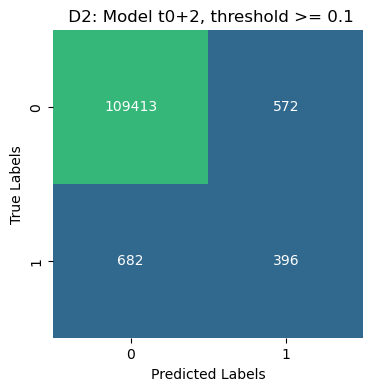

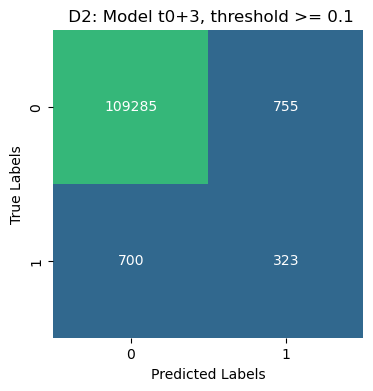

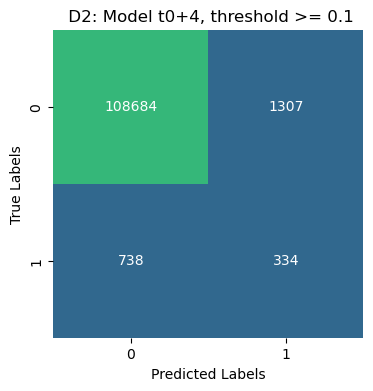

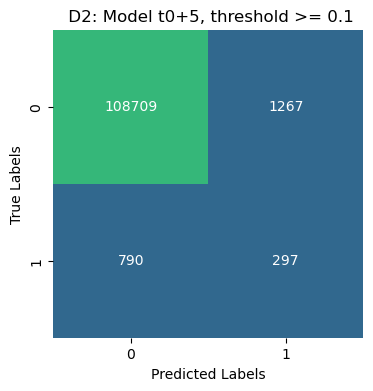

In [58]:

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t1_val1_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+1, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+1_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t2_val1_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+2, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+3_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t3_val1_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+3, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+3_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t4_val1_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+4, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+4_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t5_val1_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+5, threshold >= {threshold_1}')
plt.savefig(f'conf_matrix_{threshold_1}_t0+5_3_3percent.png')
plt.show()

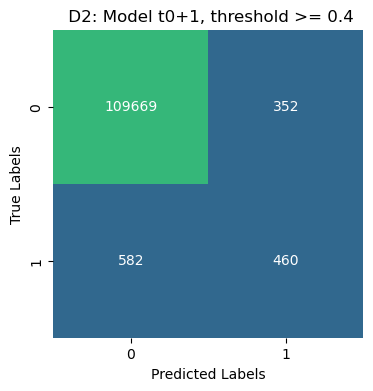

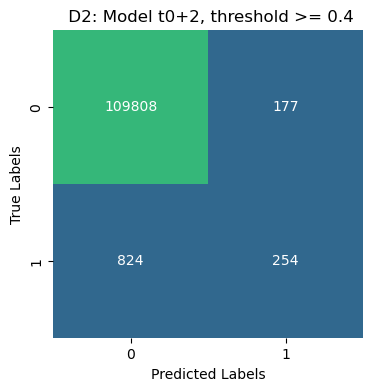

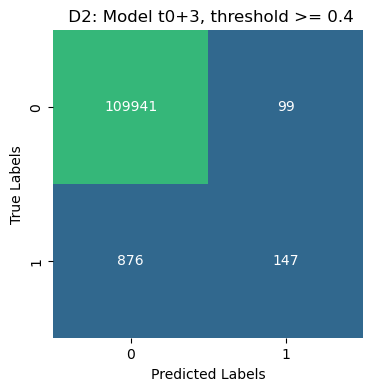

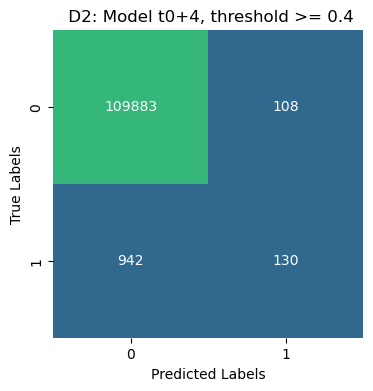

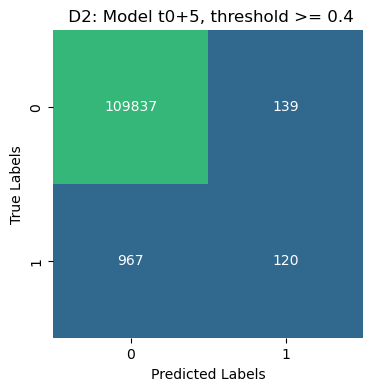

In [26]:

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t1_val2_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+1, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+1_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t2_val2_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+2, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+3_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t3_val2_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+3, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+3_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t4_val2_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+4, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+4_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t5_val2_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+5, threshold >= {threshold_2}')
plt.savefig(f'conf_matrix_{threshold_2}_t0+5_3_3percent.png')
plt.show()

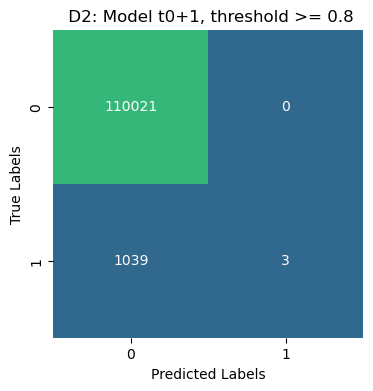

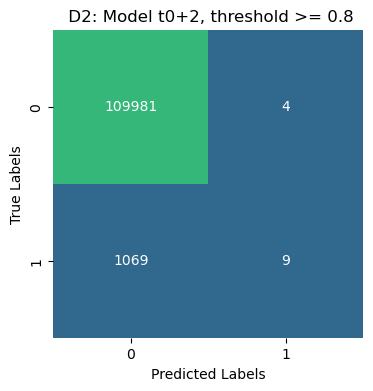

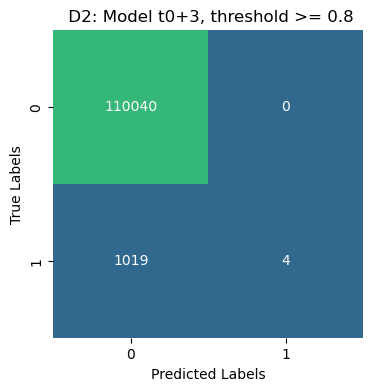

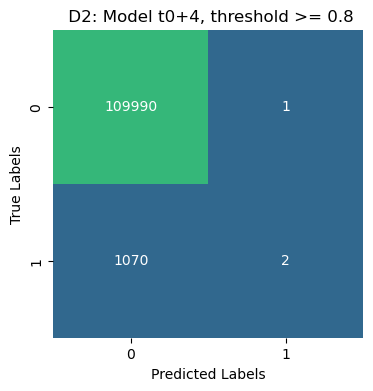

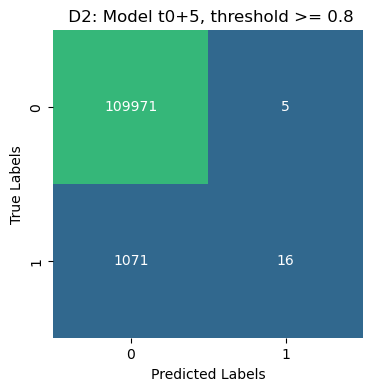

In [62]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t1_val3_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+1, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+1_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t2_val3_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+2, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+3_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t3_val3_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+3, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+3_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t4_val3_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+4, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+4_3_3percent.png')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_t5_val3_2, annot=True, fmt="d", cmap=conf_matrix_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f' D2: Model t0+5, threshold >= {threshold_3}')
plt.savefig(f'conf_matrix_{threshold_3}_t0+5_3_3percent.png')
plt.show()

# Calibration

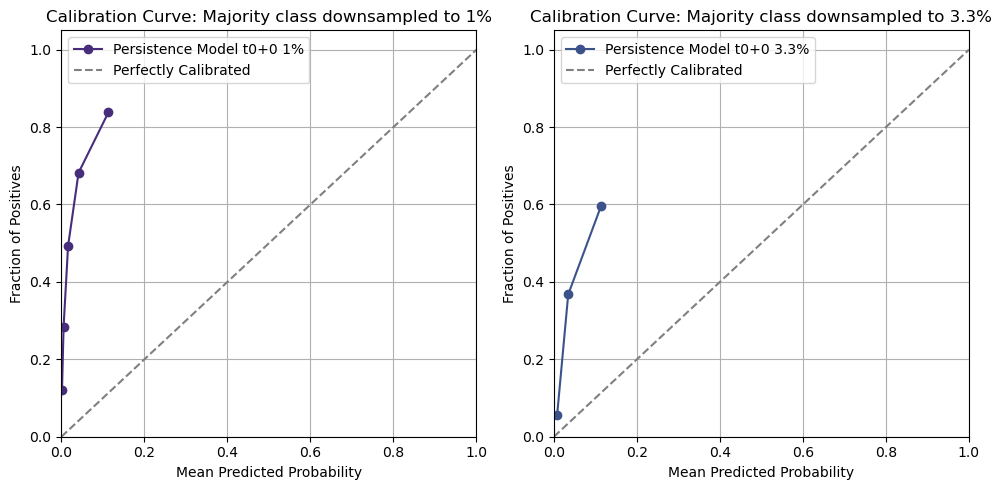

In [16]:
# Calculate calibration curve for persistence models
# 1% Majority Class
x_persistence, y_persistence=calibration_curve(y_test_persistence, y_pred_persistence)

# 3.3% Majority Class
x_persistence_2, y_persistence_2=calibration_curve(y_test_persistence_2, y_pred_persistence_2)


# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(x_persistence, y_persistence, marker='o', linestyle='-', color=cmap_2[0], label='Persistence Model t0+0 1%')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
axs[0].set_xlabel('Mean Predicted Probability')
axs[0].set_ylabel('Fraction of Positives')
axs[0].set_title('Calibration Curve: Majority class downsampled to 1%')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x_persistence_2, y_persistence_2, marker='o', linestyle='-', color=cmap_2[1], label='Persistence Model t0+0 3.3%')
plt.title('Calibration Curve: Comparison of Persistence Models for 1% and 3.3% of Majority Class')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
axs[1].set_xlabel('Mean Predicted Probability')
axs[1].set_ylabel('Fraction of Positives')
axs[1].set_title('Calibration Curve: Majority class downsampled to 3.3%')
axs[1].legend()
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()


## Instantanous

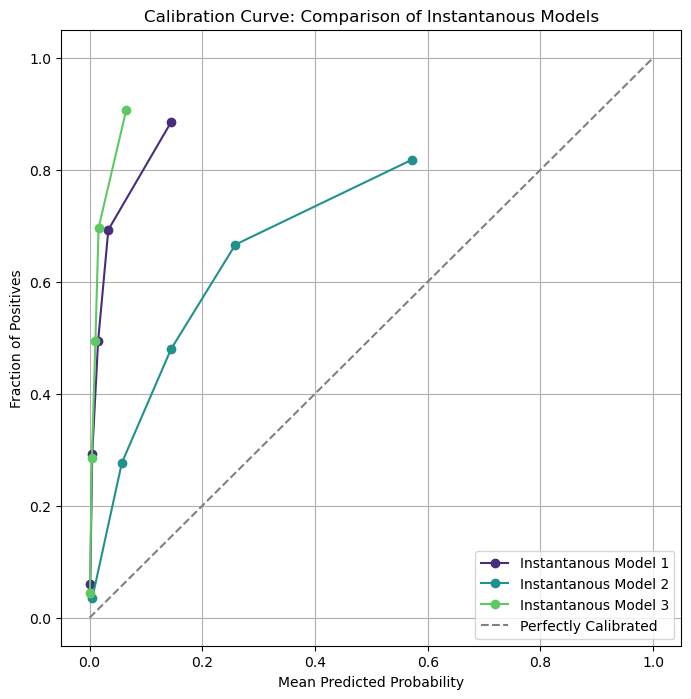

In [17]:
# Calculate calibration curve for instantanous models
# 1% Majority Class
x_instant, y_instant=calibration_curve(y_test_instant, y_pred_instant)

# 3.3% Majority Class
x_instant_2, y_instant_2=calibration_curve(y_test_instant_2, y_pred_instant_2)

# Without AUTO
x_instant_without_auto, y_instant_without_auto=calibration_curve(y_test_instant_without_auto, y_pred_instant_without_auto)


# Plot

plt.figure(figsize=(8, 8))
plt.plot(x_instant, y_instant, marker='o', linestyle='-', color=cmap_2[0], label='Instantanous Model 1')
plt.plot(x_instant_2, y_instant_2, marker='o', linestyle='-', color=cmap_2[3], label='Instantanous Model 2')
plt.plot(x_instant_without_auto, y_instant_without_auto, marker='o', linestyle='-', color=cmap_2[5], label='Instantanous Model 3')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve: Comparison of Instantanous Models')
plt.legend()
plt.grid(True)
plt.show()

# Brier Score

### Calibration Curve: Majority class downsampled to 1%

## Calibration curve: Majority class downsampled to 3.3%

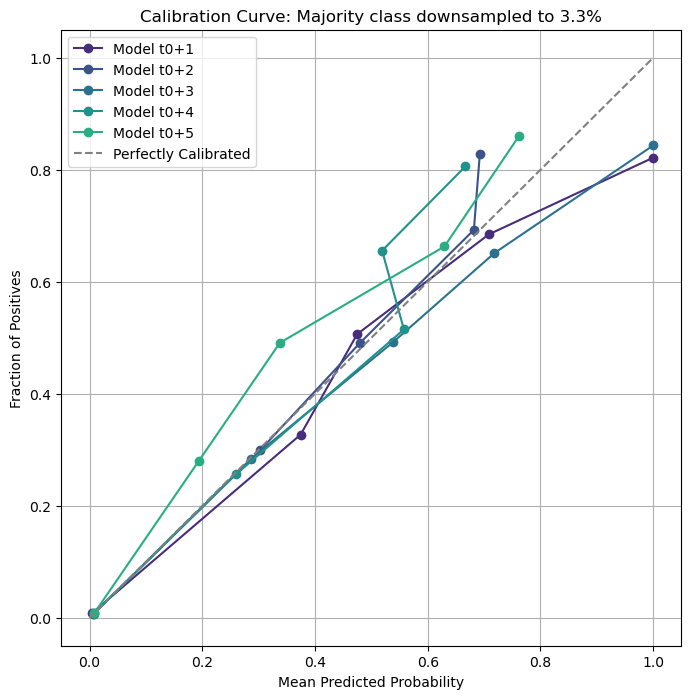

In [18]:
# Calculate calibration curve for each model
x_t1_2, y_t1_2=calibration_curve(y_test_t1_2, y_pred_t1_2)
x_t2_2, y_t2_2=calibration_curve(y_test_t2_2, y_pred_t2_2)
x_t3_2, y_t3_2=calibration_curve(y_test_t3_2, y_pred_t3_2)
x_t4_2, y_t4_2=calibration_curve(y_test_t4_2, y_pred_t4_2)
x_t5_2, y_t5_2=calibration_curve(y_test_t5_2, y_pred_t5_2)



plt.figure(figsize=(8, 8))
plt.plot(x_t1_2, y_t1_2, marker='o', linestyle='-', color=cmap_2[0], label='Model t0+1')
plt.plot(x_t2_2, y_t2_2, marker='o', linestyle='-', color=cmap_2[1], label='Model t0+2')
plt.plot(x_t3_2, y_t3_2, marker='o', linestyle='-', color=cmap_2[2], label='Model t0+3')
plt.plot(x_t4_2, y_t4_2, marker='o', linestyle='-', color=cmap_2[3], label='Model t0+4')
plt.plot(x_t5_2, y_t5_2, marker='o', linestyle='-', color=cmap_2[4], label='Model t0+5')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve: Majority class downsampled to 3.3%')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Calculate calibration curve for each model
# Downsampled Majority Class 1 percent
x_t1, y_t1=calibration_curve(y_test_t1, y_pred_t1)
x_t2, y_t2=calibration_curve(y_test_t2, y_pred_t2)
x_t3, y_t3=calibration_curve(y_test_t3, y_pred_t3)
x_t4, y_t4=calibration_curve(y_test_t4, y_pred_t4)
x_t5, y_t5=calibration_curve(y_test_t5, y_pred_t5)

# Downsampled Majority Class 3.3 percent
x_t1_2, y_t1_2=calibration_curve(y_test_t1_2, y_pred_t1_2)
x_t2_2, y_t2_2=calibration_curve(y_test_t2_2, y_pred_t2_2)
x_t3_2, y_t3_2=calibration_curve(y_test_t3_2, y_pred_t3_2)
x_t4_2, y_t4_2=calibration_curve(y_test_t4_2, y_pred_t4_2)
x_t5_2, y_t5_2=calibration_curve(y_test_t5_2, y_pred_t5_2)

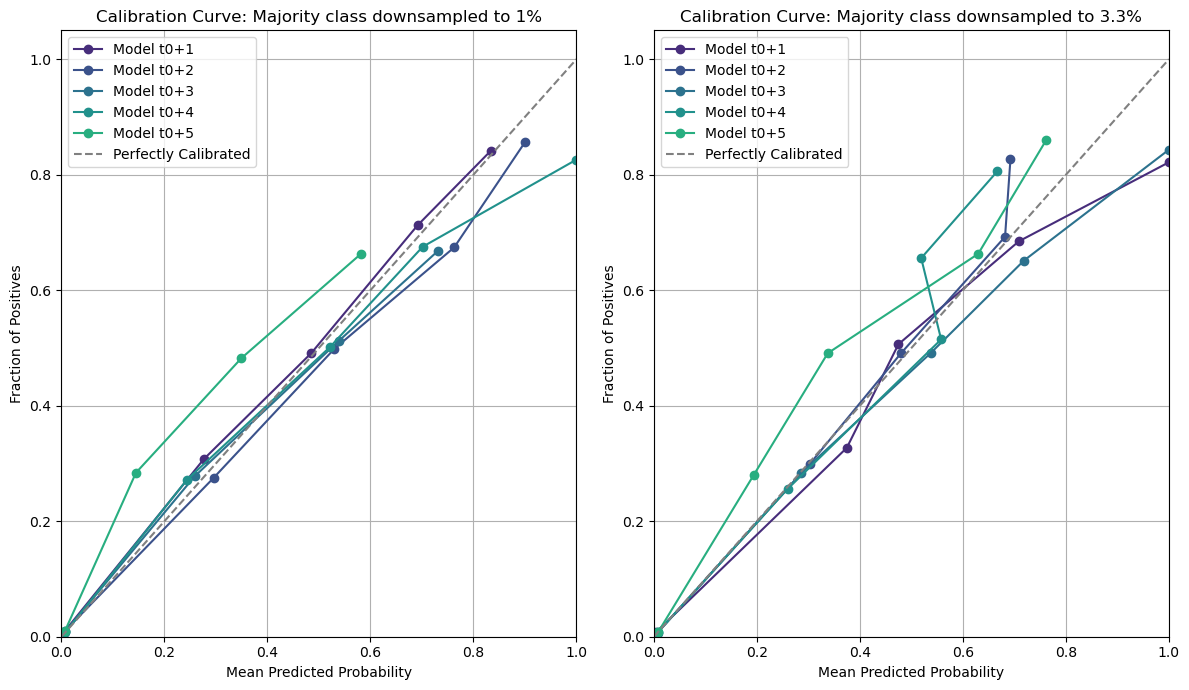

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

# Plot the first calibration curve on the first subplot
axs[0].plot(x_t1, y_t1, marker='o', color=cmap_2[0], linestyle='-', label='Model t0+1')
axs[0].plot(x_t2, y_t2, marker='o', color=cmap_2[1], linestyle='-', label='Model t0+2')
axs[0].plot(x_t3, y_t3, marker='o', color=cmap_2[2], linestyle='-', label='Model t0+3')
axs[0].plot(x_t4, y_t4, marker='o', color=cmap_2[3], linestyle='-', label='Model t0+4')
axs[0].plot(x_t5, y_t5, marker='o', color=cmap_2[4], linestyle='-', label='Model t0+5')

axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
axs[0].set_xlabel('Mean Predicted Probability')
axs[0].set_ylabel('Fraction of Positives')
axs[0].set_title('Calibration Curve: Majority class downsampled to 1%')
axs[0].legend()
axs[0].grid(True)

# Plot the second calibration curve on the second subplot
axs[1].plot(x_t1_2, y_t1_2, marker='o', color=cmap_2[0], linestyle='-', label='Model t0+1')
axs[1].plot(x_t2_2, y_t2_2, marker='o', color=cmap_2[1], linestyle='-', label='Model t0+2')
axs[1].plot(x_t3_2, y_t3_2, marker='o', color=cmap_2[2], linestyle='-', label='Model t0+3')
axs[1].plot(x_t4_2, y_t4_2, marker='o', color=cmap_2[3], linestyle='-', label='Model t0+4')
axs[1].plot(x_t5_2, y_t5_2, marker='o', color=cmap_2[4], linestyle='-', label='Model t0+5')

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
axs[1].set_xlabel('Mean Predicted Probability')
axs[1].set_ylabel('Fraction of Positives')
axs[1].set_title('Calibration Curve: Majority class downsampled to 3.3%')
axs[1].legend()
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('calibration_curve_1_and_3_3_percent.png')
# Show the plot
plt.show()

In [36]:
brier_t1 = brier_score_loss(y_test_t1, y_pred_t1)
brier_t2 = brier_score_loss(y_test_t2, y_pred_t2)
brier_t3 = brier_score_loss(y_test_t3, y_pred_t3)
brier_t4 = brier_score_loss(y_test_t4, y_pred_t4)
brier_t5 = brier_score_loss(y_test_t5, y_pred_t5)

brier_t1_2 = brier_score_loss(y_test_t1_2, y_pred_t1_2)
brier_t2_2 = brier_score_loss(y_test_t2_2, y_pred_t2_2)
brier_t3_2 = brier_score_loss(y_test_t3_2, y_pred_t3_2)
brier_t4_2 = brier_score_loss(y_test_t4_2, y_pred_t4_2)
brier_t5_2 = brier_score_loss(y_test_t5_2, y_pred_t5_2)

In [37]:
brier_list_1 = [brier_t1, brier_t2, brier_t3, brier_t4, brier_t5]
brier_list_2 = [brier_t1_2, brier_t2_2, brier_t3_2, brier_t4_2, brier_t5_2]
models = ['Model t0+1', 'Model t0+2', 'Model t0+3', 'Model t0+4', 'Model t0+5']

In [42]:
for i in range(len(brier_list_1)):
    brier_list_1[i] = round(brier_list_1[i], 4)

In [43]:
for i in range(len(brier_list_2)):
    brier_list_2[i] = round(brier_list_2[i], 4)

In [44]:
brier_list_1

[0.0065, 0.0078, 0.0077, 0.0084, 0.0093]

In [45]:
brier_list_2

[0.0067, 0.0078, 0.0079, 0.0086, 0.0089]

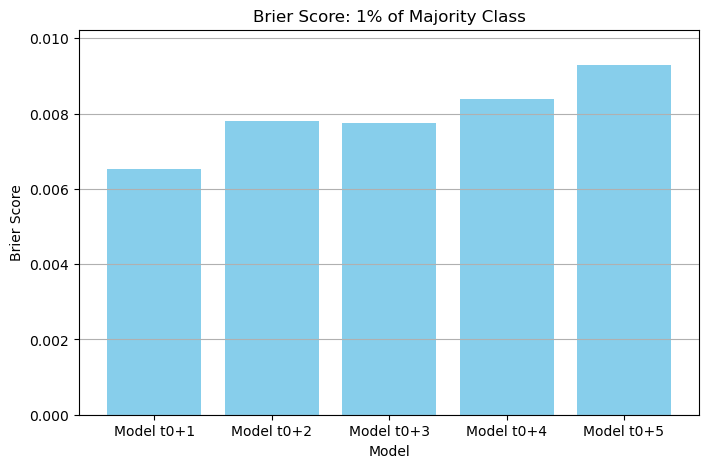

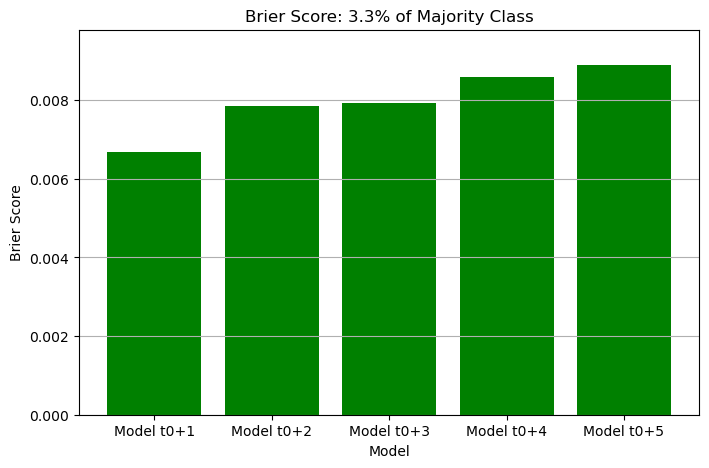

In [148]:

plt.figure(figsize=(8, 5))
plt.bar(models, brier_list_1, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Brier Score')
plt.title('Brier Score: 1% of Majority Class')
plt.ylim(0, max(brier_list_1) * 1.1)  
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(models, brier_list_2, color='green')
plt.xlabel('Model')
plt.ylabel('Brier Score')
plt.title('Brier Score: 3.3% of Majority Class')
plt.ylim(0, max(brier_list_2) * 1.1)  
plt.grid(axis='y')
plt.show()